# Example: non_reliability

https://brian2.readthedocs.io/en/stable/examples/non_reliability.html

In [1]:
import sys
#sys.path.append('/home/jovyan/brian2lava')
# sys.path.append('/home/carlo/Entwicklung/Python/brian2lava')
sys.path.append('/home/francesco/Developing/B2L/brian2lava')

In [2]:
from brian2 import *

# Import Brian2Lava
import brian2lava

# Set device
set_device('lava', hardware='CPU', debug=True)

Running Lava simulation for 0.5 s (5001 steps)


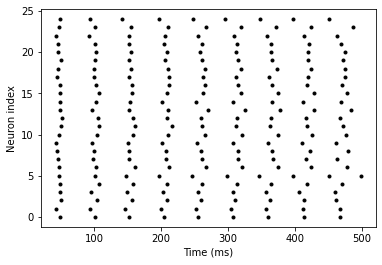

In [3]:
N = 25
tau = 20*ms
sigma = .015
eqs_neurons = '''
dx/dt = (1.1 - x) / tau + sigma * (2 / tau)**.5 * xi : 1 (unless refractory)
'''
neurons = NeuronGroup(N, model=eqs_neurons, threshold='x > 1', reset='x = 0',
                      refractory=5*ms, method='euler')
spikes = SpikeMonitor(neurons)

run(500*ms)
plot(spikes.t/ms, spikes.i, '.k')
xlabel('Time (ms)')
ylabel('Neuron index')
show()
